# Confidence Intervals

**import libraries**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Standard Error

The claimed mean for boxed ceral is 20. We can calculate the Standard Error of the Mean of or sample to see if the 
expected fits within our Standard Error

In [6]:
data = "https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Cereal/cereal_weights.csv"

df = pd.read_csv(data)
display(df.describe())

,weight
count,10000.000000
mean,20.499212
std,0.199874
min,19.752000
25%,20.365000
50%,20.500000
75%,20.635000
max,21.171000


In [9]:
# Calculating the Standard Error of the Mean
stderr_mean = stats.sem(df['weight'])
print("The Standard Error of the Mean: ", stderr_mean.round(6))

The Standard Error of the Mean:  0.001999


We can conclude that our sample of ceral weights does not meet the expected result.
expected mean was 20, sample mean is 20.5 and the std is .02.
our expected range is 20.3 - 20.7 given the std.

# Central Limit Theorem(CLT)

**Exponential Distribution to Normal Distribution**

### Exponetial Distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

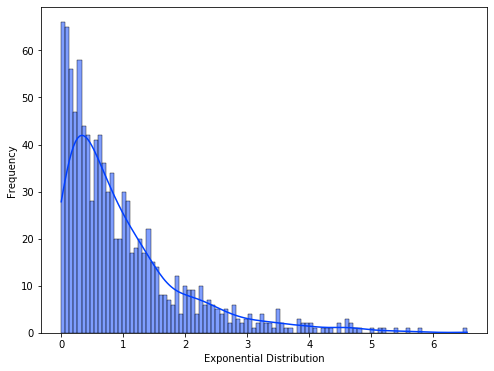

In [4]:
# Set the style-sheet
plt.style.use('seaborn-bright')

# Create the figure and axes objects
fig, ax = plt.subplots(1, 1, figsize=(8,6))

# Create an exponential distribution
# (with a sample size of 1000)
data_exp = stats.expon.rvs(size=1000)

# Plot the distribution and the kernel density estimate (KDE)
ax = sns.histplot(data_exp, kde=True, bins=100)

# Set the axis labels
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

### Distribution after CLT

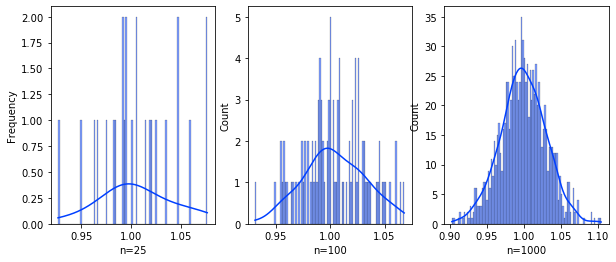

In [6]:
# Create a list of means for each set of samples

###
# Initialize the list to hold the means
rs_means_n25 = []
# Loop 25 times, fill the list with 25 sample means
for i in range(25):
    # Draw random samples from the exponential distribution
    rs_exp = np.random.exponential(scale=1.0, size=1000)
    # Append the mean of the random sample
    rs_means_n25.append(rs_exp.mean())

###
# Initialize the list to hold the means
rs_means_n100 = []

# Loop 100 times, fill the list with 100 sample means
for i in range(100):
    # Draw random samples from the exponential distribution
    rs_exp = np.random.exponential(scale=1.0, size=1000)
    # Append the mean of the random sample
    rs_means_n100.append(rs_exp.mean())

###
# Initialize the list to hold the means
rs_means_n1000 = []
# Loop 1000 times, fill the list with 1000 sample means
for i in range(1000):
    # Draw random samples from the exponential distribution
    rs_exp = np.random.exponential(scale=1.0, size=1000)
    # Append the mean of the random sample
    rs_means_n1000.append(rs_exp.mean())
# Create the figure, axes objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

# Plot each example on the correspond axis
sns.histplot(rs_means_n25, kde=True, bins=100, ax=ax1)
ax1.set(xlabel='n=25', ylabel='Frequency')

sns.histplot(rs_means_n100, kde=True, bins=100, ax=ax2)
ax2.set(xlabel='n=100')

sns.histplot(rs_means_n1000, kde=True, bins=100, ax=ax3)
ax3.set(xlabel='n=1000');

### Confidence Interval with cereal data

In [9]:
data = "https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Cereal/cereal_weights.csv"

df = pd.read_csv(data)

display(df.describe())

,weight
count,10000.000000
mean,20.499212
std,0.199874
min,19.752000
25%,20.365000
50%,20.500000
75%,20.635000
max,21.171000


95% confidence intervals calculated with stats.t.ppf:
20.499 20.495 20.503
95% confidence intervals calculated with stats.t.interval: 
 20.495 20.503


C:\Users\tyler\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


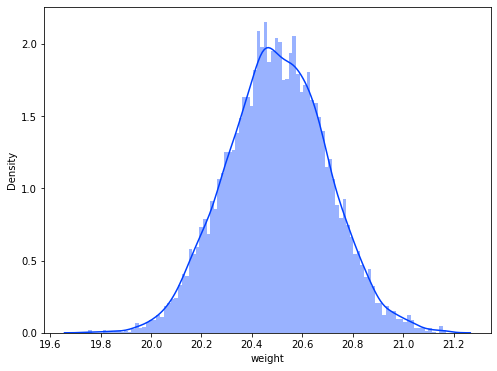

In [14]:
confidence = .95
mean = df["weight"].mean()
# Number of samples
n = len(df["weight"])
stderr_mean = stats.sem(df['weight'])

# Construct the CI with the Percent-Point Function (ppf)
interval = stderr_mean * stats.t.ppf((1 + confidence) / 2.0, n - 1)
print('95% confidence intervals calculated with stats.t.ppf:')
print(round(mean, 3), round((mean - interval), 3), round((mean + interval), 3))

# Construct the CI with the stats.t.interval method
CI = stats.t.interval(alpha=0.95, df=n-1, loc=mean, scale=stderr_mean)
print('95% confidence intervals calculated with stats.t.interval: \n', round(CI[0], 3), round(CI[1], 3))

# Create the figure and axes objects
fig, ax = plt.subplots(1, 1, figsize=(8,6))

# Plot the distribution and the kernel density estimate (KDE)
ax = sns.distplot(df['weight'], kde=True, bins=100)

